In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [4]:
# load data
data=loadmat('ex7faces.mat')
data.keys()
X=data['X']
print(np.shape(X))

(5000, 1024)


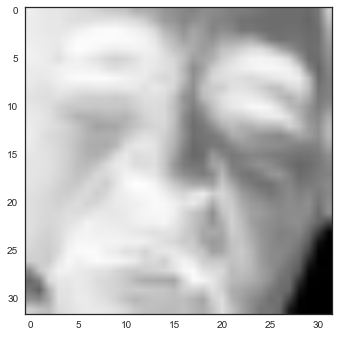

In [18]:
# show a random face
x=X[np.random.choice(len(X))].reshape(32,32)
plt.imshow(x.T);

In [44]:
# normalize X
X_mean=np.mean(X,0)
X_norm=X-X_mean
#X_std=np.std(X,0)
#X_norm=(X-X_mean)/X_std

In [45]:
# run PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=36)
pca.fit(X_norm)

PCA(copy=True, n_components=36, whiten=False)

In [46]:
# fractions of variabilities explained by the two components
print(pca.explained_variance_ratio_) 

[ 0.30274785  0.13705104  0.06628695  0.04108175  0.03500328  0.02192786
  0.02069321  0.01822944  0.01588659  0.01551337  0.01273706  0.01261559
  0.01103331  0.00894721  0.00823909  0.00765908  0.00755911  0.00677059
  0.00669005  0.0061461   0.00550269  0.00545217  0.0053592   0.00508183
  0.00489449  0.00474028  0.00462835  0.00436935  0.00420854  0.00419832
  0.00392887  0.0038748   0.00369645  0.00358337  0.00345728  0.00325888]


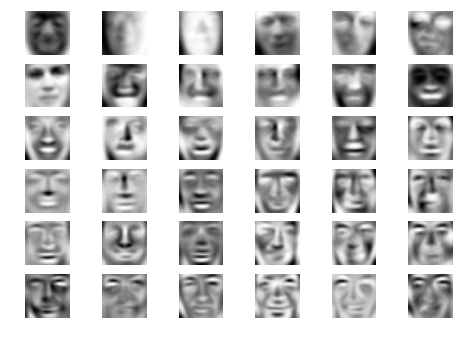

In [52]:
# show the eigen vectors
for i,v in enumerate(pca.components_):
    plt.subplot(6,6,i+1)
    plt.imshow(v.reshape(32,32).T);
    plt.axis('off')

In [37]:
# project data
X_reduced=pca.transform(X_norm)

In [38]:
# recover data
X_recovered=pca.inverse_transform(X_reduced)

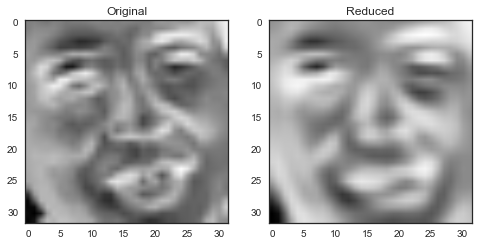

In [43]:
# compare the original and recover face
idx=np.random.choice(len(X))
x_orig=X_norm[idx].reshape(32,32)
x_rec=X_recovered[idx].reshape(32,32)
plt.subplot(1,2,1), plt.imshow(x_orig.T), plt.title('Original');
plt.subplot(1,2,2), plt.imshow(x_rec.T), plt.title('Reduced');